# Виконання

## Обробка тексту для постів twitter

### Для початку імпортуємо модулі та зчитаємо файл.

In [91]:
import numpy as np
import pandas as pd
import nltk
import re
df = pd.read_csv('twitter1.csv', sep=',')
df

,id_t,theme,att,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


*Зчитування файлу*

### Видалимо порожні документи, якщо вони є.

In [92]:
import math
df = df[~((df.content.str.strip() == ''))]
df.dropna(inplace=True)
df

/tmp/ipykernel_10082/1016440772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,id_t,theme,att,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


*Видалення порожніх документів*

### Перетворимо категоріальні змінні у числові за допомогою класу LabelEncoder з модуля sklearn.preprocessing.

In [93]:
from sklearn.preprocessing import LabelEncoder
theme_encoder = LabelEncoder()
att_encoder = LabelEncoder()
df['theme_lable'] = theme_encoder.fit_transform(df.theme)
df['att_lable'] = att_encoder.fit_transform(df.att)
df

/tmp/ipykernel_10082/109004829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['theme_lable'] = theme_encoder.fit_transform(df.theme)
/tmp/ipykernel_10082/109004829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['att_lable'] = att_encoder.fit_transform(df.att)


,id_t,theme,att,content,theme_lable,att_lable
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,4,3
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4,3
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,4,3
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,4,3
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4,3
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,21,3
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,21,3
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,21,3
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,21,3


*Перетворення категоріальних змінних в числові*

### Визначимо стоп-слова англійської мови.

In [94]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

*Стоп-слова*

In [95]:
@np.vectorize
def preproc_doc(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc


df['clean_content'] = preproc_doc(df.content)
df.head()

/tmp/ipykernel_10082/1153405362.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_content'] = preproc_doc(df.content)


,id_t,theme,att,content,theme_lable,att_lable,clean_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,4,3,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4,3,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,4,3,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,4,3,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,4,3,im getting borderlands murder


*Обробка документів*

### У результаті попередньої обробки деякі документи могли стати порожніми. Тому потрібно це перевірити.

In [96]:
df.replace(r'^(\s?)+$', np.nan, regex=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73824 entries, 0 to 74681
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_t           73824 non-null  int64 
 1   theme          73824 non-null  object
 2   att            73824 non-null  object
 3   content        73824 non-null  object
 4   theme_lable    73824 non-null  int64 
 5   att_lable      73824 non-null  int64 
 6   clean_content  72364 non-null  object
dtypes: int64(3), object(4)
memory usage: 4.5+ MB


/tmp/ipykernel_10082/2279878495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(r'^(\s?)+$', np.nan, regex=True, inplace=True)


*Перевірка на присутність пустих значень*

### Видалимо пусті значення.

In [97]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72364 entries, 0 to 72363
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_t           72364 non-null  int64 
 1   theme          72364 non-null  object
 2   att            72364 non-null  object
 3   content        72364 non-null  object
 4   theme_lable    72364 non-null  int64 
 5   att_lable      72364 non-null  int64 
 6   clean_content  72364 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.9+ MB


*Видалення пустих значень*

## Класифікація для постів twitter

### Використаємо TF-IDF модель для представлення тексту у векторному вигляді.

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
df_x = tv.fit_transform(df.clean_content)
df_y = df.att_lable.values
df_x

<72364x38207 sparse matrix of type '<class 'numpy.float64'>'
	with 751474 stored elements in Compressed Sparse Row format>

*TF-IDF модель*

### Додамо до аргументів колонку тем.

In [99]:
from scipy import sparse
df_x = sparse.hstack([df_x, df.theme_lable.values[:, None]])
df_x

<72364x38208 sparse matrix of type '<class 'numpy.float64'>'
	with 821592 stored elements in COOrdinate format>

*Аргументи*

## Побудова моделі

### Визначимо продуктивність роботи моделі на прикладі матриці невідповідностей. Для цього застосуємо sklearn.metrics.plot_confusion_matrix.

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def conf_mat(model, x_test, y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cm, annot=True, fmt=".1f")
    plt.xlabel('Predicted')

*Функція побудови матриці невідповідностей*

### Побудуємо графік ROC( Receiver Operating Characteristic ), що є графіком істинно позитивної відносної частоти проти хибно позитивної частоти.

In [101]:
from sklearn.metrics import roc_curve, roc_auc_score
def roc(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="Area = "+str(auc)+')')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc=4)
    plt.show()

*Імпортування модуля та визначення функції roc*

### Розділимо дані на навчальні та тестові, отримаємо чотири масиви: документи для навчання, документи для тестування, мітки для навчання, мітки для тестування.

In [102]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((50654, 38208), (21710, 38208))

*Розділення даних на навчальні та тестові*

### Оберемо декілька методів класифікації.

In [103]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = {
    'nb': MultinomialNB(alpha=1),
    'log': LogisticRegression(
        penalty='l2', max_iter=50, C=1, random_state=0),
    'lin_svc': LinearSVC(penalty='l2', C=1, random_state=0),
    'rfc': RandomForestClassifier(n_estimators=10, random_state=0),
    'gbc': GradientBoostingClassifier(n_estimators=10, random_state=0)
}

*Методи класифікації*

### Визначимо функцію отримання результатів.

In [104]:
def get_results(models, x_train, y_train, x_test, y_test) -> dict:
    results = []
    for name, model in models.items():
        model.fit(x_train, y_train)
        results.append((name, {
                'model': model,
                'train': model.score(x_train, y_train),
                'test': model.score(x_test, y_test),
            })
        )
    return dict(results)  

*Функція отримання результатів*

### Натренуємо моделі та визначимо результати.

In [105]:
results = get_results(models, x_train, y_train, x_test, y_test)
results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'nb': {'model': MultinomialNB(alpha=1),
  'train': 0.7300114502309788,
  'test': 0.6687240902809765},
 'log': {'model': LogisticRegression(C=1, max_iter=50, random_state=0),
  'train': 0.5737157973703952,
  'test': 0.5584983878397052},
 'lin_svc': {'model': LinearSVC(C=1, random_state=0),
  'train': 0.9381095273818455,
  'test': 0.8505757715338553},
 'rfc': {'model': RandomForestClassifier(n_estimators=10, random_state=0),
  'train': 0.9932877956331188,
  'test': 0.8871487793643482},
 'gbc': {'model': GradientBoostingClassifier(n_estimators=10, random_state=0),
  'train': 0.4173806609547124,
  'test': 0.41754951635191156}}

*Результати точності класифікації*

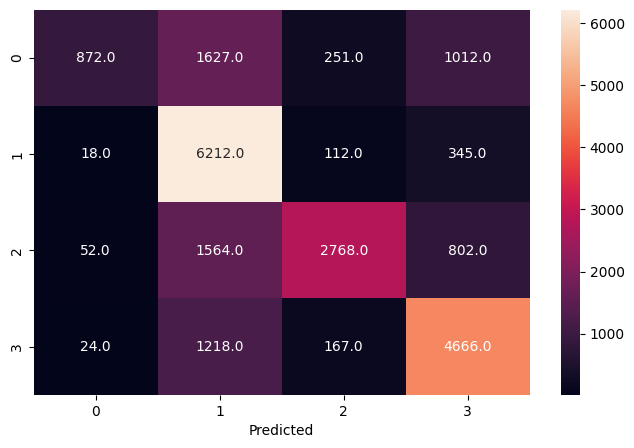

In [106]:
conf_mat(results['nb']['model'], x_test, y_test)

*Матриця невідповідностей для Naive Bayes*

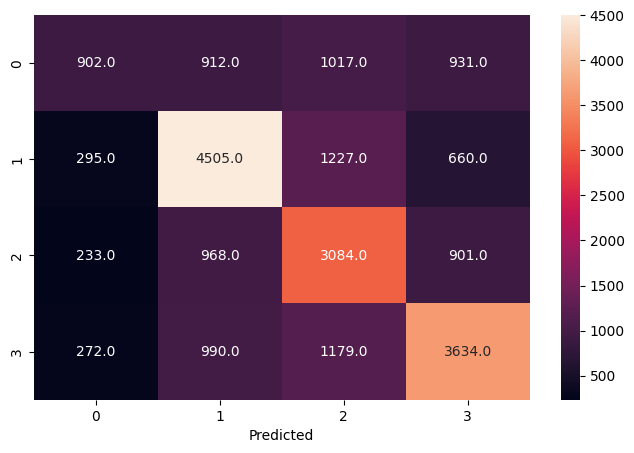

In [107]:
conf_mat(results['log']['model'], x_test, y_test)

*Матриця невідповідностей для Logistic Regression*

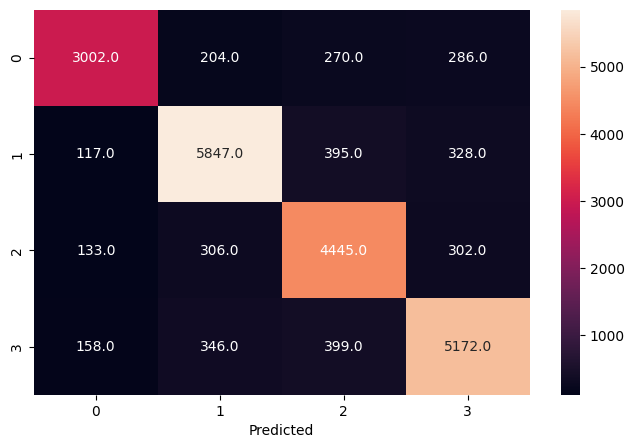

In [108]:
conf_mat(results['lin_svc']['model'], x_test, y_test)

*Матриця невідповідностей для Linear SVC*

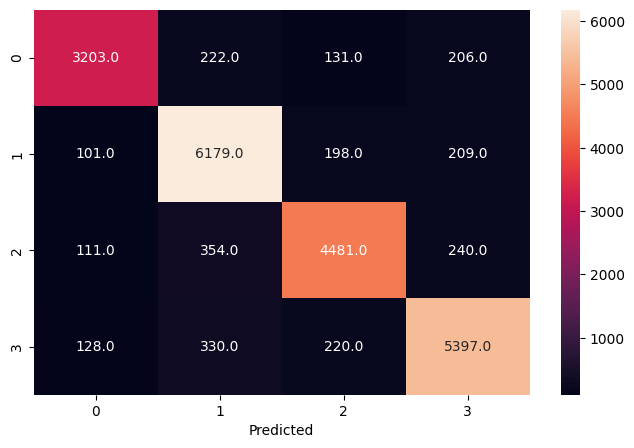

In [109]:
conf_mat(results['rfc']['model'], x_test, y_test)

*Матриця невідповідностей для Random Forest*

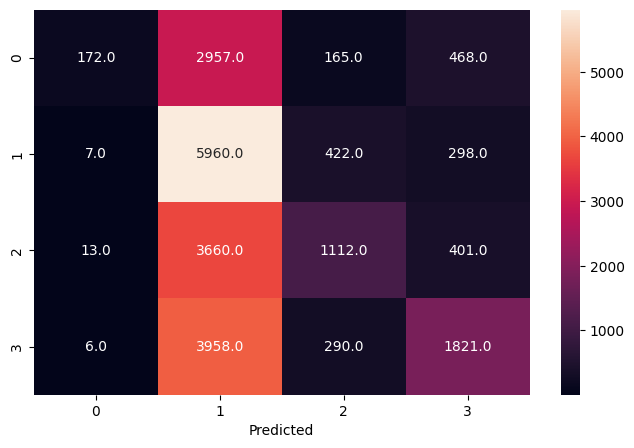

In [110]:
conf_mat(results['gbc']['model'], x_test, y_test)

*Матриця невідповідностей для Gradient Boosting*

## Аналіз результатів моделі для постів twitter

In [111]:
res_list = []
for name, inner in results.items():
    res_list.append((name, inner['train'], 'train'))
    res_list.append((name, inner['test'], 'test'))
df_score = pd.DataFrame(res_list, columns=['method','score','type'])
df_score

,method,score,type
0,nb,0.730011,train
1,nb,0.668724,test
2,log,0.573716,train
3,log,0.558498,test
4,lin_svc,0.938110,train
5,lin_svc,0.850576,test
6,rfc,0.993288,train
7,rfc,0.887149,test
8,gbc,0.417381,train
9,gbc,0.417550,test


*Датафрейм результатів*

### Для наочності побудуємо гістограму.

<AxesSubplot: xlabel='method', ylabel='score'>

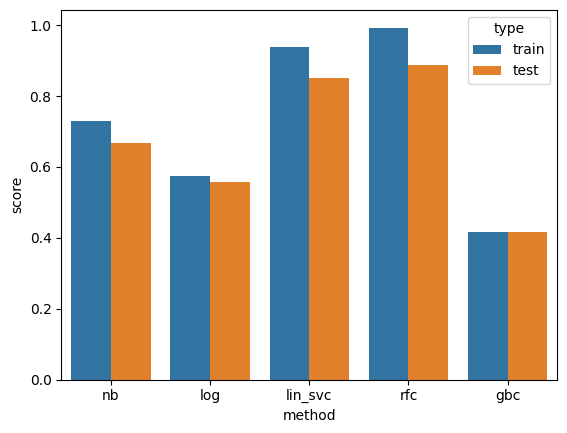

In [112]:
sns.barplot(x='method', y='score', hue='type', data=df_score)

*Результати моделей*

## TextBlob

### Імпортуємо textblob.

In [135]:
from textblob import TextBlob

*Імпортування textblob*

### Покажемо список можливих настроїв.

In [136]:
att_encoder.classes_

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

*Можливі настрої*

### Розіб'ємо знову дані на тренувальні та тестові, зробимо прогнози настроїв за допомогою textblob.

In [138]:
train_blob, test_blob = df.content[:20000], df.att_lable[:20000]
    

tbresult = [TextBlob(i).sentiment.polarity for i in train_blob.values]
tbpred = []
for r in tbresult:
    if r <-0.2:
        tbpred.append(1)
    elif -0.2 <= r < 0:
        tbpred.append(0)
    elif 0 <= r < 0.2:
        tbpred.append(2)
    else:
        tbpred.append(3)

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
72359    Just realized that the Windows partition of my...
72360    Just realized that my Mac window partition is ...
72361    Just realized the windows partition of my Mac ...
72362    Just realized between the windows partition of...
72363    Just like the windows partition of my Mac is l...
Name: content, Length: 72364, dtype: object

*Прогнози настроїв*

### Виведемо матрицю невідповідностей.

Text(0.5, 25.722222222222214, 'Predicted')

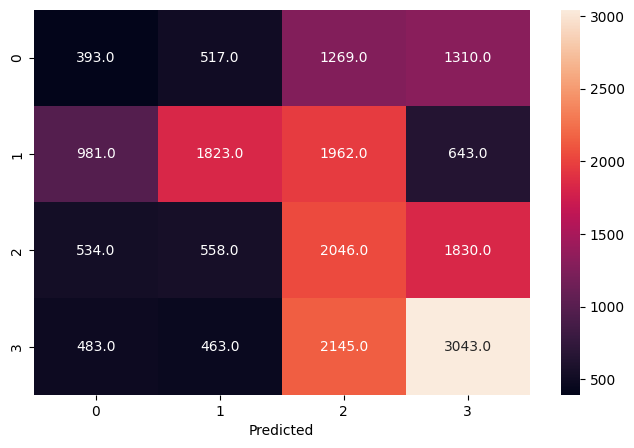

In [139]:
cm = confusion_matrix(test_blob, tbpred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt=".1f")
plt.xlabel('Predicted')

*Матриця невідповідностей*

### Перевіримо якості моделей на випадкових значеннях.

In [140]:
for _ in range(3):
    row = df.sample()
    sent = row.content.values[0]
    
    sent_transformed = tv.transform([sent])
    theme_lable = np.array([row.theme_lable.values[0]])
    row_x = sparse.hstack([sent_transformed, theme_lable[:, None]])
    predicted = results["rfc"]["model"].predict(row_x)
    encoded = att_encoder.inverse_transform(predicted)
    
    textblobed = TextBlob(sent).sentiment.polarity
    
    print(f'Sentence: {sent}')
    print(f'Theme: {row.theme.values[0]}')
    print(f'Attitude: {row.att.values[0]}')
    print(f'Model Attitude: {encoded}')
    print(f'TextBlob: {textblobed}')
    print()

Sentence: With so many stunning personalities like est.est.. com / starladder-imb...
Theme: Dota2
Attitude: Neutral
Model Attitude: ['Neutral']
TextBlob: 0.5

Sentence: " Is Amazon still very pretty much business as usual for old UK record biz " from @DrewHill of @ProperMusicGrp counters rumours that Amazon has halted large shipments of exclusive physical electronic music - in even the UK... at least for @murraystassen @musicbizworld musicbusinessworldwide. com / amazon - still - v …
Theme: Amazon
Attitude: Neutral
Model Attitude: ['Neutral']
TextBlob: 0.0413265306122449

Sentence: BEAT.SABER.IS.CRAZY.FUN!! But damn, you're going to sweat harder than a Fortnite Soccer Skin!
Theme: Fortnite
Attitude: Positive
Model Attitude: ['Positive']
TextBlob: -0.125



*Перевірка якості моделей на випадкових значеннях*